In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import RandomizedSearchCV

from time import time
from joblib import dump
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor 
from sklearn.model_selection import GridSearchCV


from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer


In [248]:
df=pd.read_csv('ml_dataset_total_layer_var.csv')
df_rounded=df

In [249]:
x=df_rounded[['Speed (mm/s)','Flowrate (cm^3/s)']]
y=df_rounded['total_print_deviation']

In [250]:
# Train-test split only
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(172, 2)
(43, 2)


In [251]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [252]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [253]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [254]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [255]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [256]:
# Build a dictionary of model names
from collections import OrderedDict
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'DT': DecisionTreeRegressor,
    'KNR': KNeighborsRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'CBR': CatBoostRegressor,
    'LR': LinearRegression,
    'XGB': XGBRegressor
})

In [257]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\Ahmad\AppData\Local\Temp\ipykernel_18204\3087810594.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model DT: DecisionTreeRegressor
Now fitting and evaluating model KNR: KNeighborsRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model CBR: CatBoostRegressor
Learning rate set to 0.03021
0:	learn: 4.0525685	total: 5.39ms	remaining: 5.38s
1:	learn: 4.0057477	total: 9.34ms	remaining: 4.66s
2:	learn: 3.9657637	total: 14.7ms	remaining: 4.89s
3:	learn: 3.9272452	total: 18.3ms	remaining: 4.56s
4:	learn: 3.8984506	total: 22.2ms	remaining: 4.41s
5:	learn: 3.8595995	total: 24.7ms	remaining: 4.08s
6:	learn: 3.8189482	total: 29.2ms	remaining: 4.15s
7:	learn: 3.7803286	total: 30.3ms	remaining: 3.76s
8:	learn: 3.7442300	total: 31.3ms	remaining: 3.44s
9:	learn: 3.7042877	total: 33ms	remaining: 3.27s
10:	learn: 3.6698205	total: 35.2ms	remaining: 3.17s
11:	learn: 3.6364867	total: 37.7ms	remaining: 3.1s
12:	learn: 3.6085991	total: 40.6ms	rem

In [258]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.001058,0.000000,3.401264,4.096049,-0.067030,3.272719,3.964878
1,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.000000,-0.013822,3.194346,4.124259,0.122616,2.689677,3.595310
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.001094,0.271841,2.942956,3.495249,0.266007,2.668731,3.288421
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.002866,0.323460,2.406558,3.369085,0.441389,2.000552,2.868772
4,LR,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.000000,0.353932,2.626561,3.292338,0.446842,2.172318,2.854738
5,KNR,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000000,0.566615,1.950111,2.696512,0.478067,1.797918,2.772994
6,XGB,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",0.106560,0.847331,0.629965,1.600444,0.488120,1.816266,2.746158
7,abr,AdaBoostRegressor,"{'base_estimator': 'deprecated', 'estimator': ...",0.002707,0.497706,2.145143,2.902982,0.496718,1.837769,2.722997
8,DT,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",0.000000,0.847409,0.606631,1.600037,0.520112,1.628196,2.658957
9,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.210103,0.847409,0.606631,1.600037,0.527388,1.569284,2.638724


In [161]:
df_classics.to_csv('df_classics_initial results.csv')

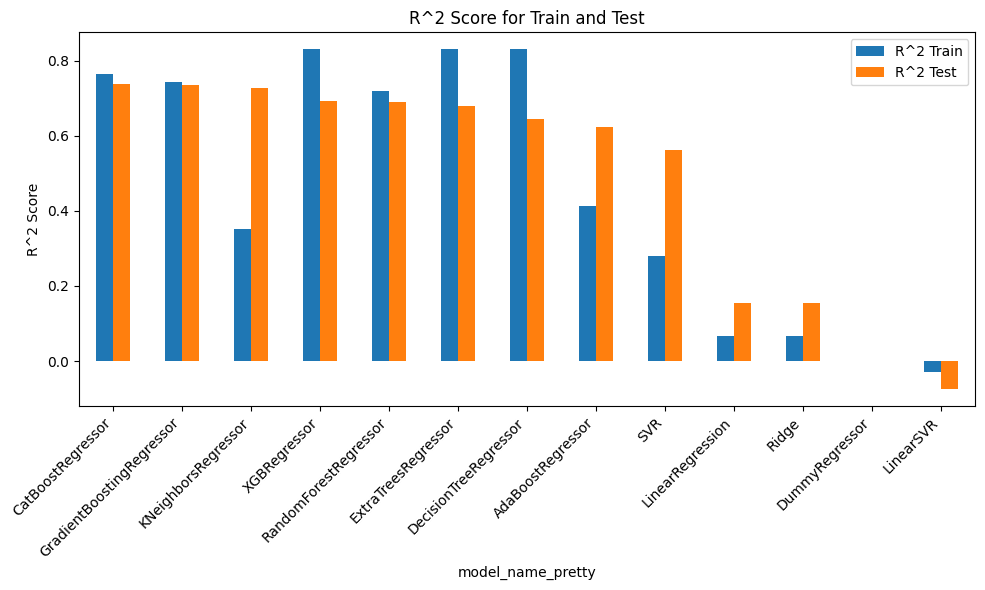

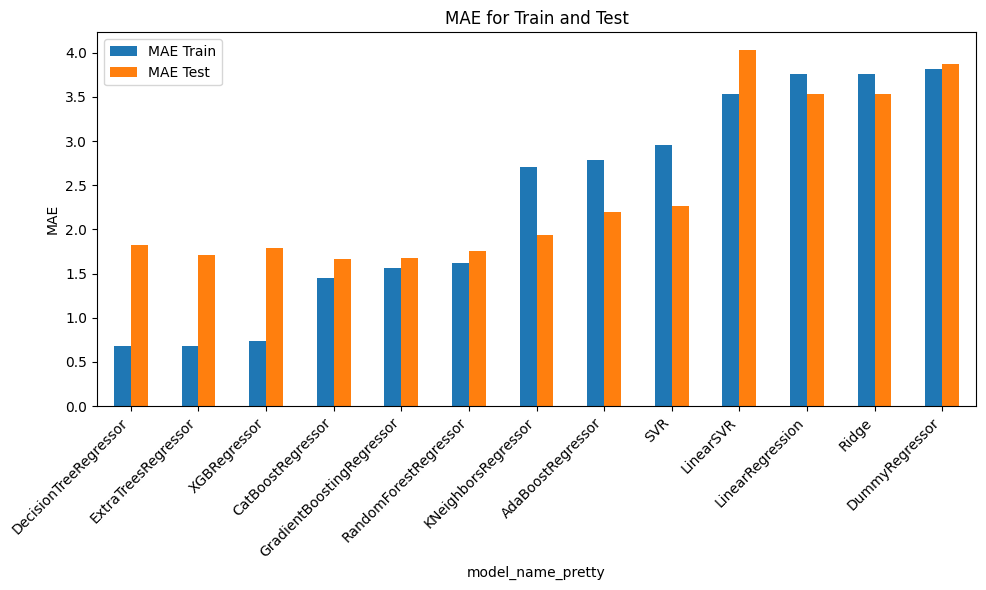

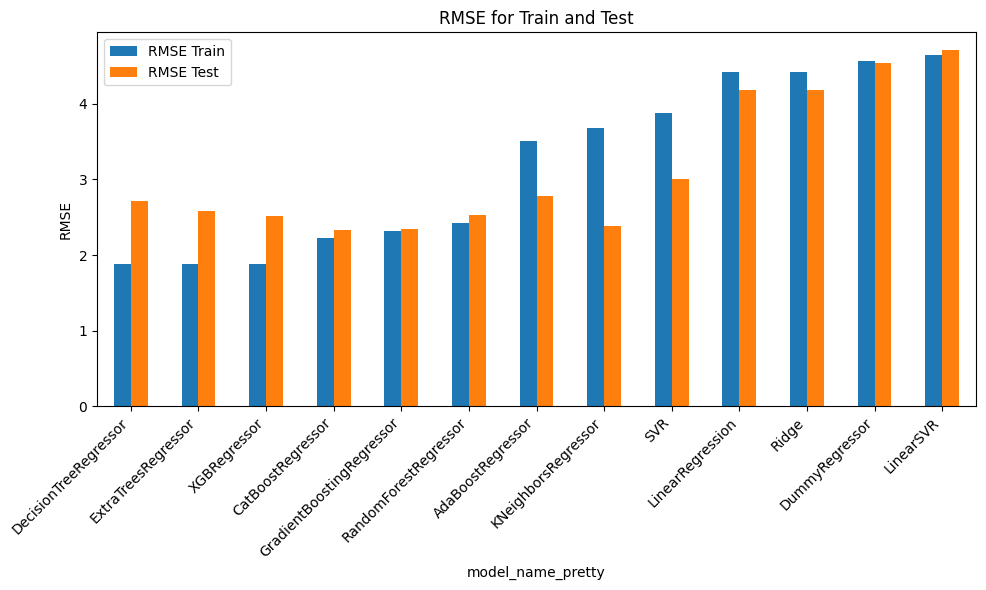

In [13]:
df_classics.set_index('model_name_pretty', inplace=True)

# R^2 Plot for train and test, sorted from highest to lowest for train
df_sorted_r2 = df_classics.sort_values('r2_val', ascending=False)
ax_r2 = df_sorted_r2[['r2_train', 'r2_val']].plot(kind='bar', figsize=(10, 6))
ax_r2.set_ylabel('R^2 Score')
ax_r2.set_title('R^2 Score for Train and Test')
ax_r2.legend(["R^2 Train", "R^2 Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()

# MAE Plot for train and test, sorted from lowest to highest for train
df_sorted_mae = df_classics.sort_values('mae_train', ascending=True)
ax_mae = df_sorted_mae[['mae_train', 'mae_val']].plot(kind='bar', figsize=(10, 6))
ax_mae.set_ylabel('MAE')
ax_mae.set_title('MAE for Train and Test')
ax_mae.legend(["MAE Train", "MAE Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mae_comparison.png')
plt.show()

# RMSE Plot for train and test, sorted from lowest to highest for train
df_sorted_rmse = df_classics.sort_values('rmse_train', ascending=True)
ax_rmse = df_sorted_rmse[['rmse_train', 'rmse_val']].plot(kind='bar', figsize=(10, 6))
ax_rmse.set_ylabel('RMSE')
ax_rmse.set_title('RMSE for Train and Test')
ax_rmse.legend(["RMSE Train", "RMSE Test"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rmse_comparison.png')
plt.show()

In [163]:
classic_models

OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('DT', DecisionTreeRegressor()),
             ('KNR', KNeighborsRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('CBR', <catboost.core.CatBoostRegressor at 0x1bbf1418950>),
             ('LR', LinearRegression()),
             ('XGB',
              XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None, feature_types=None,
                           gamma=None, grow_policy=None, importance_type=None,
                           interaction_con

In [179]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual Print Height Deviation (mm)')
    plt.ylabel(f'Predicted Print Height Deviation  (mm)')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

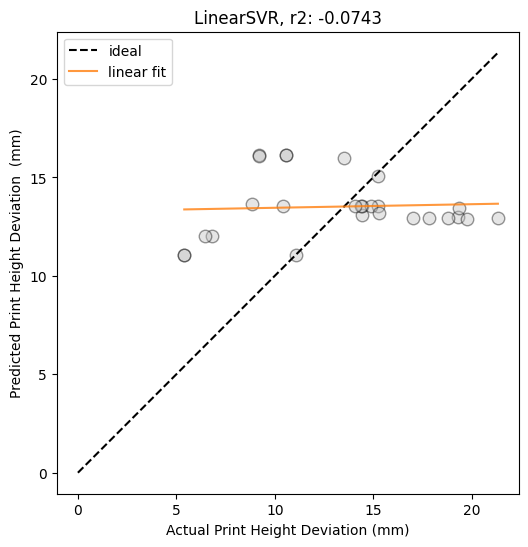

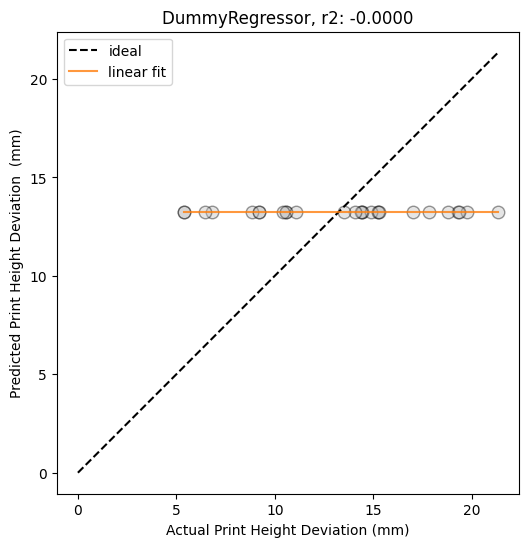

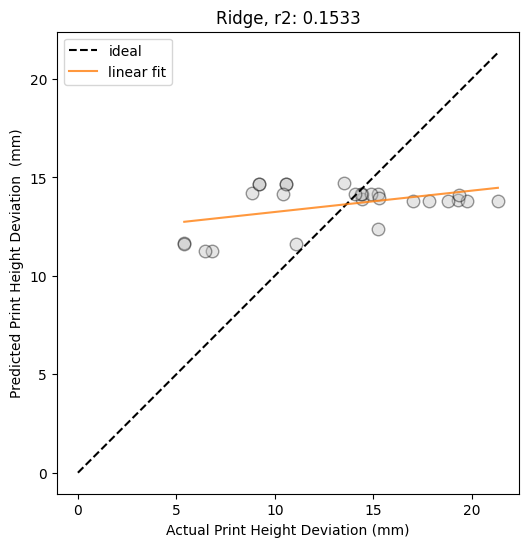

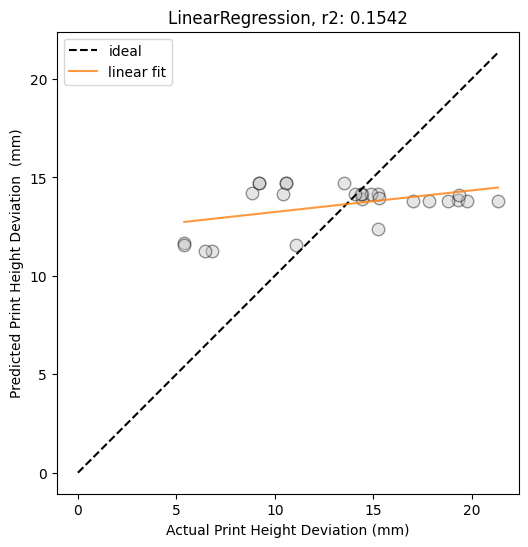

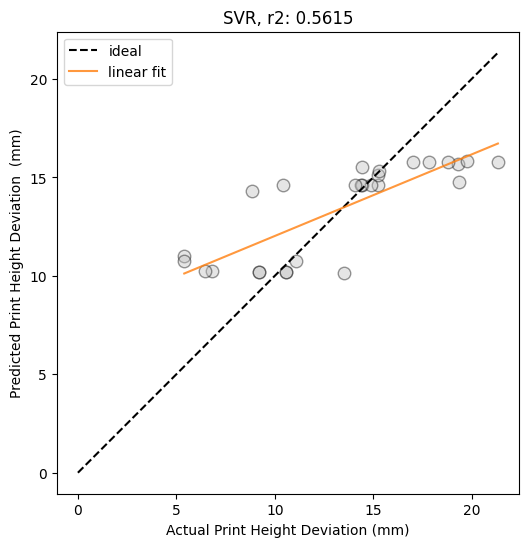

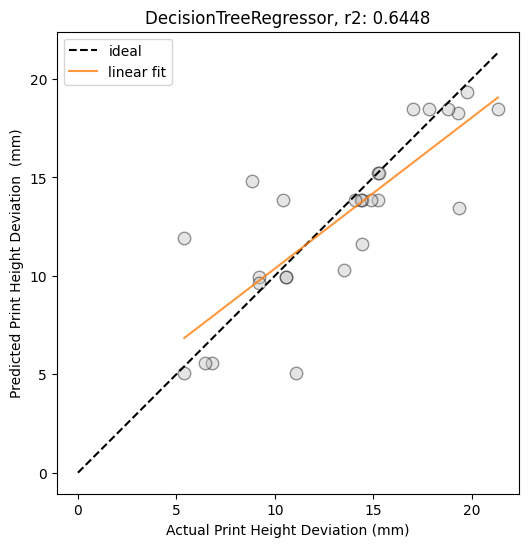

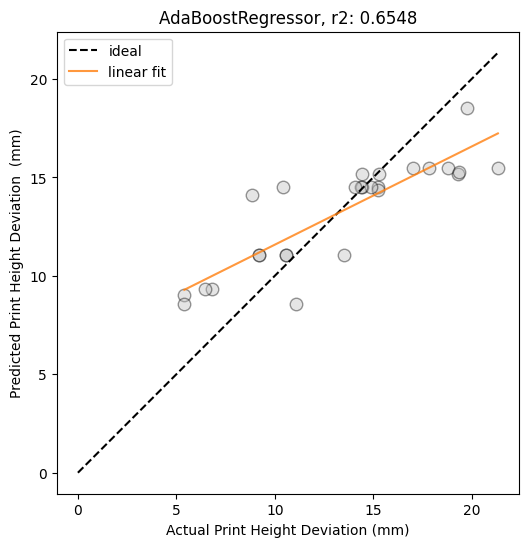

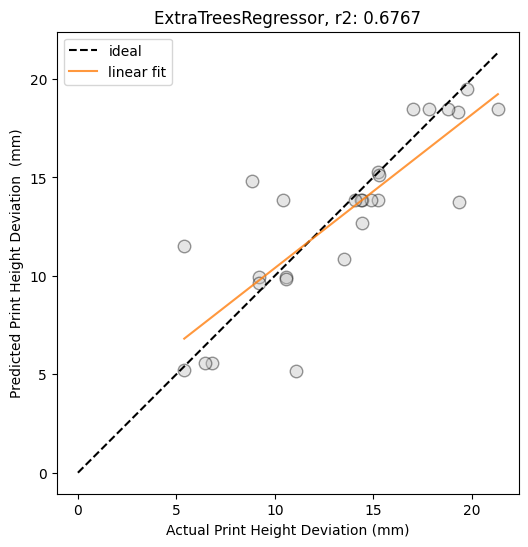

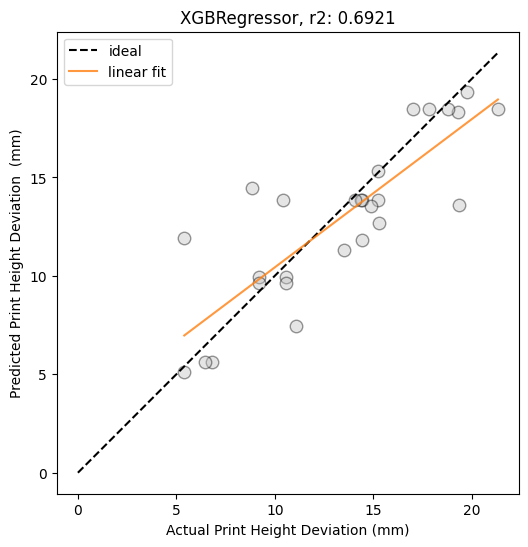

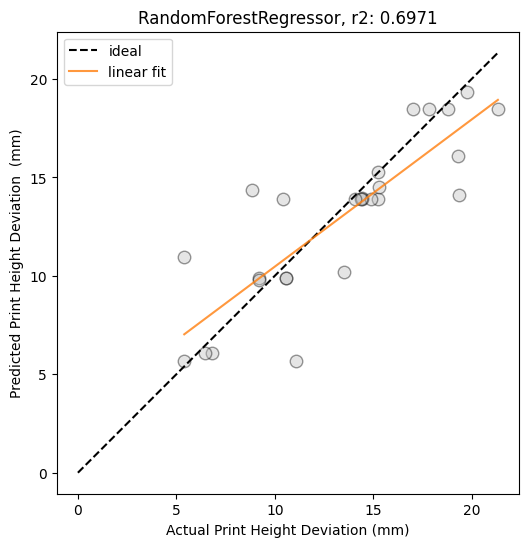

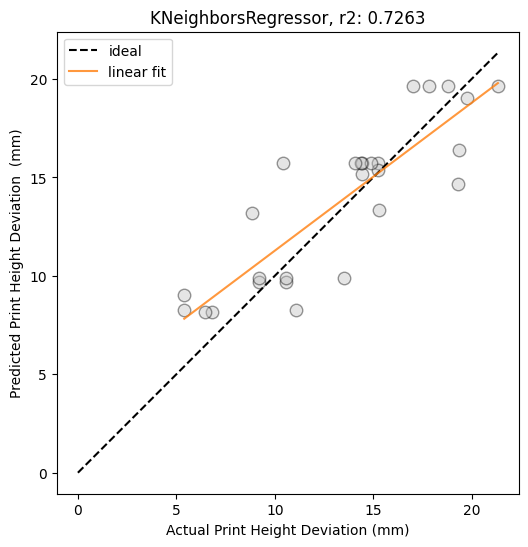

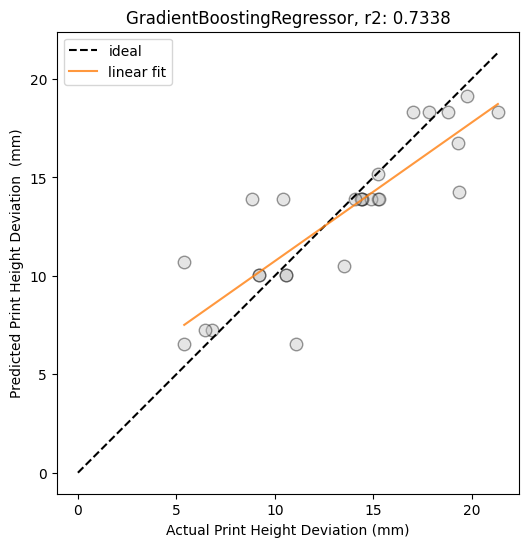

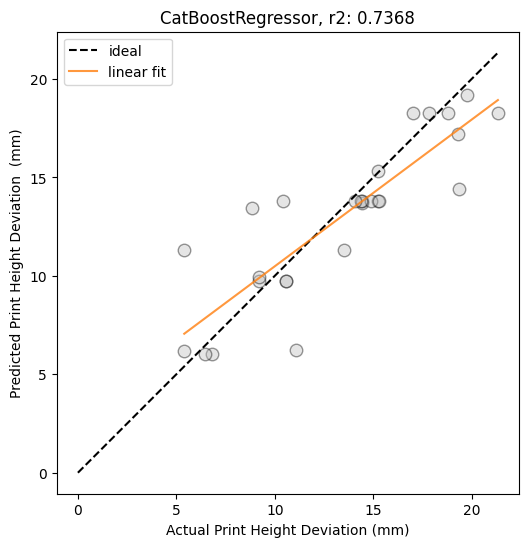

In [180]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (MPa)')

In [187]:
# Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)
print(model)

In [176]:
# Concatenate the train and validation datasets together
#X_train_new = np.concatenate((X_train, X_val), axis=0)
#y_train_new = pd.concat((y_train, y_val), axis=0)

#print(X_train_new.shape)

In [185]:
ti = time()

model.fit(X_train, y_train)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

Learning rate set to 0.031087
0:	learn: 4.5184892	total: 856us	remaining: 855ms
1:	learn: 4.4753621	total: 1.65ms	remaining: 821ms
2:	learn: 4.4359823	total: 2.49ms	remaining: 829ms
3:	learn: 4.3953855	total: 2.88ms	remaining: 718ms
4:	learn: 4.3561818	total: 3.5ms	remaining: 697ms
5:	learn: 4.3128930	total: 4.13ms	remaining: 685ms
6:	learn: 4.2733647	total: 4.92ms	remaining: 698ms
7:	learn: 4.2299770	total: 5.67ms	remaining: 703ms
8:	learn: 4.1952346	total: 6.3ms	remaining: 694ms
9:	learn: 4.1619133	total: 6.94ms	remaining: 687ms
10:	learn: 4.1243049	total: 7.63ms	remaining: 686ms
11:	learn: 4.0954321	total: 8.39ms	remaining: 691ms
12:	learn: 4.0694663	total: 9.24ms	remaining: 701ms
13:	learn: 4.0419179	total: 9.86ms	remaining: 694ms
14:	learn: 4.0116840	total: 10.5ms	remaining: 688ms
15:	learn: 3.9751144	total: 11ms	remaining: 677ms
16:	learn: 3.9398390	total: 11.6ms	remaining: 671ms
17:	learn: 3.9134779	total: 12.2ms	remaining: 663ms
18:	learn: 3.8946253	total: 12.7ms	remaining: 656

In [188]:
y_act_test = y_test
y_pred_test = model.predict(X_test)

r2, mae, rmse = evaluate_model(model, X_test, y_test)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ MPa')

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

# New Study

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import RandomizedSearchCV

from time import time
from joblib import dump
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor 
from sklearn.model_selection import GridSearchCV


from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer


In [354]:
df=pd.read_csv('ml_dataset_total_layer_var.csv')
df_rounded=df

In [412]:
x=df_rounded[['Speed (mm/s)','Flowrate (cm^3/s)']]
y=df_rounded['total_print_deviation']

In [461]:
# Train-test split only
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalization
X_train = normalize(X_train)
X_test = normalize(X_test)

(172, 2)
(43, 2)


In [462]:
# Instantiate model function
def instantiate_model(model_name):
    model = model_name()
    return model

# Fit model function
def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

# Evaluate model function
def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

In [463]:
# Fit and evaluate model function (updated for train-test only)
def fit_evaluate_model(model, model_name, X_train, y_train, X_test, y_act_test):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_act_test)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_test': r2_test,
        'mae_test': mae_test,
        'rmse_test': rmse_test}
    return model, result_dict

In [464]:
# DataFrame to store results
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_test',
                                    'mae_test',
                                    'rmse_test'])

In [465]:
# Models dictionary
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'DT': DecisionTreeRegressor,
    'KNR': KNeighborsRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'CBR': CatBoostRegressor,
    'LR': LinearRegression,
    'XGB': XGBRegressor
})

classic_models = OrderedDict()

In [466]:
# Keep track of elapsed time
ti = time()

# Fit, predict, and evaluate
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_test, y_test)
    df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)
    classic_models[model_name] = model

# Total elapsed time
dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')


Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\Ahmad\AppData\Local\Temp\ipykernel_18204\869819337.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_classics = pd.concat([df_classics, pd.DataFrame([result_dict])], ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model DT: DecisionTreeRegressor
Now fitting and evaluating model KNR: KNeighborsRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model CBR: CatBoostRegressor
Learning rate set to 0.031002
0:	learn: 4.0305908	total: 3.4ms	remaining: 3.4s
1:	learn: 3.9888360	total: 6.22ms	remaining: 3.1s
2:	learn: 3.9481429	total: 9.45ms	remaining: 3.14s
3:	learn: 3.9086462	total: 12.8ms	remaining: 3.19s
4:	learn: 3.8756098	total: 15.3ms	remaining: 3.04s
5:	learn: 3.8347824	total: 17.8ms	remaining: 2.96s
6:	learn: 3.7971421	total: 19.9ms	remaining: 2.83s
7:	learn: 3.7638271	total: 23.1ms	remaining: 2.86s
8:	learn: 3.7298621	total: 25.4ms	remaining: 2.8s
9:	learn: 3.6982011	total: 27.2ms	remaining: 2.69s
10:	learn: 3.6648069	total: 29.5ms	remaining: 2.65s
11:	learn: 3.6360646	total: 32.2ms	remaining: 2.65s
12:	learn: 3.6036651	total: 34.1ms	rem

In [467]:
# Sort by increasing test r2 score
df_classics = df_classics.sort_values('r2_test', ignore_index=True)
df_classics


,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_test,mae_test,rmse_test
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000000,0.000000,3.399300,4.073723,-0.018945,3.948605,4.572580
1,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.000000,0.042200,3.314932,3.986841,0.065780,3.741288,4.378349
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.000707,0.061798,3.366022,3.945841,0.092643,3.751930,4.314941
3,LR,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.002999,0.061824,3.366015,3.945787,0.094133,3.748688,4.311397
4,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.004047,0.343236,2.418121,3.301385,0.288074,2.949470,3.822111
5,XGB,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",0.116095,0.828729,0.674490,1.685906,0.295508,2.760239,3.802102
6,DT,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",0.000000,0.828899,0.642077,1.685067,0.371376,2.680108,3.591546
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.175875,0.828899,0.642077,1.685067,0.406434,2.603083,3.489960
8,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.382449,0.766019,1.220552,1.970526,0.460733,2.544408,3.326502
9,abr,AdaBoostRegressor,"{'base_estimator': 'deprecated', 'estimator': ...",0.011061,0.479020,2.295387,2.940369,0.491544,2.671384,3.230073
